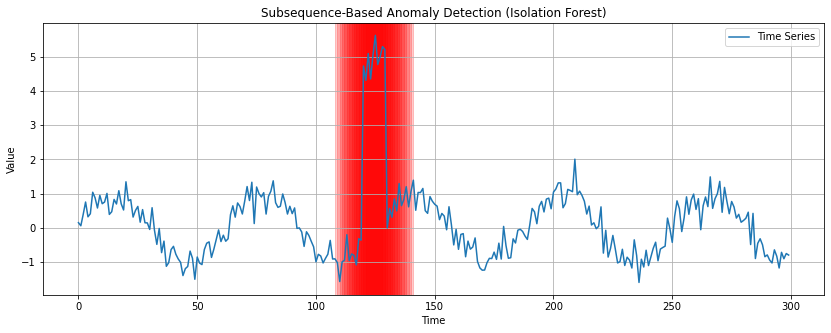

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Step 1: Generate time series with anomaly
np.random.seed(42)
n = 300
t = np.linspace(0, 30, n)
ts = np.sin(t) + 0.3 * np.random.randn(n)

# Inject anomaly
ts[120:130] += 5  # spike anomaly

# Step 2: Create subsequences using sliding window
def create_subsequences(ts, window_size=20, stride=1):
    subsequences = []
    indices = []
    for i in range(0, len(ts) - window_size + 1, stride):
        subseq = ts[i:i + window_size]
        subsequences.append(subseq)
        indices.append(i)
    return np.array(subsequences), np.array(indices)

window_size = 20
stride = 1
subseqs, start_indices = create_subsequences(ts, window_size, stride)

# Step 3: Normalize and apply Isolation Forest
scaler = StandardScaler()
X = scaler.fit_transform(subseqs)

model = IsolationForest(contamination=0.05, random_state=42).fit(X)
scores = model.decision_function(X)
labels = model.predict(X)  # -1 = anomaly, 1 = normal

# Step 4: Plot anomalies on time series
anomaly_windows = start_indices[labels == -1]

plt.figure(figsize=(14, 5))
plt.plot(ts, label='Time Series')
for idx in anomaly_windows:
    plt.axvspan(idx, idx + window_size, color='red', alpha=0.2)
plt.title("Subsequence-Based Anomaly Detection (Isolation Forest)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()
